In [2]:
import os
import pickle
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import pearsonr

In [3]:
def age_debiasing(predicted_ages, chronological_ages):
    
    predicted_ages = predicted_ages.to_numpy()
    chronological_ages = chronological_ages.to_numpy()
    
    ones = np.ones(len(chronological_ages))
    chronological_ages_squared = np.square(chronological_ages)
    chronological_ages_confounds = np.array([ones, chronological_ages])
    
    ones_predicted = np.ones(len(predicted_ages))
    predicted_ages_squared = np.square(predicted_ages)
    predicted_ages_confounds = np.array([ones_predicted, predicted_ages])
    
    predicted_ages = np.reshape(predicted_ages, (len(predicted_ages), 1) )
    beta = np.dot( np.linalg.pinv(chronological_ages_confounds.T), predicted_ages )

    corrected_predicted_ages = (predicted_ages.flatten() - beta[0])/beta[1]
    
    return corrected_predicted_ages

In [3]:
T1_nonlinear="1"
T1_linear="2"
jacobian="56"
vbm="4"

T2_nonlinear="5"
T2_lesions="57"
swi="6"

rsfmri_0="7"
rsfmri_1="8"
rsfmri_2="9"
rsfmri_3="10"
rsfmri_4="11"
rsfmri_5="12"
rsfmri_6="13"
rsfmri_7="14"
rsfmri_8="15"
rsfmri_9="16"
rsfmri_10="17"
rsfmri_11="18"
rsfmri_12="19"
rsfmri_13="20"
rsfmri_14="21"
rsfmri_15="22"
rsfmri_16="23"
rsfmri_17="24"
rsfmri_18="25"
rsfmri_19="26"
rsfmri_20="27"
rsfmri_21="28"
rsfmri_22="29"
rsfmri_23="30"
rsfmri_24="31"

tfmri_1="32"
tfmri_2="33"
tfmri_5="34"

tfmri_c_1="35"
tfmri_c_2="36"
tfmri_c_5="37"

tracts="3"

tbss_FA_s="38"
tbss_ICVF_s="39"
tbss_ISOVF_s="40"
tbss_L1_s="41"
tbss_L2_s="42"
tbss_L3_s="43"
tbss_MD_s="44"
tbss_MO_s="45"
tbss_OD_s="46"

tbss_FA="47"
tbss_ICVF="48"
tbss_ISOVF="49"
tbss_L1="50"
tbss_L2="51"
tbss_L3="52"
tbss_MD="53"
tbss_MO="54"
tbss_OD="55"

dfs = [

T1_nonlinear,
T1_linear,
jacobian,
vbm,

T2_nonlinear,
T2_lesions,
swi,

rsfmri_0,
rsfmri_1,
rsfmri_2,
rsfmri_3,
rsfmri_4,
rsfmri_5,
rsfmri_6,
rsfmri_7,
rsfmri_8,
rsfmri_9,
rsfmri_10,
rsfmri_11,
rsfmri_12,
rsfmri_13,
rsfmri_14,
rsfmri_15,
rsfmri_16,
rsfmri_17,
rsfmri_18,
rsfmri_19,
rsfmri_20,
rsfmri_21,
rsfmri_22,
rsfmri_23,
rsfmri_24,

tfmri_1,
tfmri_2,
tfmri_5,

tfmri_c_1,
tfmri_c_2,
tfmri_c_5,

tracts,

tbss_FA_s,
tbss_ICVF_s,
tbss_ISOVF_s,
tbss_L1_s,
tbss_L2_s,
tbss_L3_s,
tbss_MD_s,
tbss_MO_s,
tbss_OD_s,

tbss_FA,
tbss_ICVF,
tbss_ISOVF,
tbss_L1,
tbss_L2,
tbss_L3,
tbss_MD,
tbss_MO,
tbss_OD
]

names = [

'T1_nonlinear',
'T1_linear',
'jacobian',
'vbm',

'T2_nonlinear',
'T2_lesions',
'swi',

'rsfmri_0',
'rsfmri_1',
'rsfmri_2',
'rsfmri_3',
'rsfmri_4',
'rsfmri_5',
'rsfmri_6',
'rsfmri_7',
'rsfmri_8',
'rsfmri_9',
'rsfmri_10',
'rsfmri_11',
'rsfmri_12',
'rsfmri_13',
'rsfmri_14',
'rsfmri_15',
'rsfmri_16',
'rsfmri_17',
'rsfmri_18',
'rsfmri_19',
'rsfmri_20',
'rsfmri_21',
'rsfmri_22',
'rsfmri_23',
'rsfmri_24',

'tfmri_1',
'tfmri_2',
'tfmri_5',

'tfmri_c_1',
'tfmri_c_2',
'tfmri_c_5',

'tracts',

'tbss_FA_s',
'tbss_ICVF_s',
'tbss_ISOVF_s',
'tbss_L1_s',
'tbss_L2_s',
'tbss_L3_s',
'tbss_MD_s',
'tbss_MO_s',
'tbss_OD_s',

'tbss_FA',
'tbss_ICVF',
'tbss_ISOVF',
'tbss_L1',
'tbss_L2',
'tbss_L3',
'tbss_MD',
'tbss_MO',
'tbss_OD'
]

dfs1, dfs2, dfs3 = [], [], []

dfs1 = dfs.copy()
dfs2 = dfs.copy()
dfs3 = dfs.copy()

for idx in range(len(dfs)):
    
    dfs1[idx] = '../predictions/AM5-' + dfs1[idx] + '_predictions/output_statistics_test.csv'
    dfs2[idx] = '../predictions/AM6-' + dfs2[idx] + '_predictions/output_statistics_test.csv'
    dfs3[idx] = '../predictions/AM7-' + dfs3[idx] + '_predictions/output_statistics_test.csv'
    
for idx in range(len(dfs)):
    dfs1[idx] = pd.read_csv(dfs1[idx])
    dfs2[idx] = pd.read_csv(dfs2[idx])
    dfs3[idx] = pd.read_csv(dfs3[idx])

In [4]:
for idx in range(len(dfs)):
    dfs[idx] = pd.merge(dfs1[idx], dfs2[idx], on='Unnamed: 0', how='inner')
    dfs[idx] = pd.merge(dfs[idx], dfs3[idx], on='Unnamed: 0', how='inner')
    
    dfs[idx].rename({
        'target_age_x': 'target_age_original',
        'output_age_x': 'output_age_1',
        'age_delta_x': 'age_delta_1',
        'loss_x': 'loss_1',
        'target_age_y': 'target_age_2',
        'output_age_y': 'output_age_2',
        'age_delta_y': 'age_delta_2',
        'loss_y': 'loss_2',
        'target_age': 'target_age_3',
        'output_age': 'output_age_3',
        'age_delta': 'age_delta_3',
        'loss': 'loss_3',
    }, axis=1, inplace=True)
    
    dfs[idx].drop(['target_age_2', 'target_age_3'], axis=1, inplace=True)
    
    dfs[idx].rename({
        'target_age_original': 'target_age',
    }, axis=1, inplace=True)
    
    dfs[idx]['mean_output_age'] = dfs[idx][['output_age_1', 'output_age_2', 'output_age_3']].mean(axis=1)
    dfs[idx]['mean_age_delta'] = dfs[idx]['mean_output_age'] - dfs[idx]['target_age']

In [5]:
for idx in range(len(dfs)):    
    dfs[idx]['output_age_decon'] = age_debiasing(dfs[idx].mean_output_age, dfs[idx].target_age) 
    dfs[idx]['age_delta_decon'] = dfs[idx].output_age_decon - dfs[idx].target_age

In [6]:
print("{:13} : {:15}  |  {:13}  |  {:13}  |  {:13}".format('Modality', 'Run1', "Run2", "Run3", "MEAN"))
print('-----------------------------------------------------------------------------------------------')

for idx in range(len(dfs)):
    print("{:13} : {:7.3f} ± {:.3f}  |  {:.3f} ± {:.3f}  |  {:.3f} ± {:.3f}  |  MEAN --- {:.3f} ± {:.3f}".format(
        names[idx],
        np.abs(dfs[idx].age_delta_1).mean(), np.abs(dfs[idx].age_delta_1).std()/np.sqrt(len(dfs[idx])),
        np.abs(dfs[idx].age_delta_2).mean(), np.abs(dfs[idx].age_delta_2).std()/np.sqrt(len(dfs[idx])),
        np.abs(dfs[idx].age_delta_3).mean(), np.abs(dfs[idx].age_delta_3).std()/np.sqrt(len(dfs[idx])),
        np.abs(dfs[idx].mean_age_delta).mean(), np.abs(dfs[idx].mean_age_delta).std()/np.sqrt(len(dfs[idx])),
    )
         )

Modality      : Run1             |  Run2           |  Run3           |  MEAN         
-----------------------------------------------------------------------------------------------
T1_nonlinear  :   2.676 ± 0.031  |  2.786 ± 0.032  |  2.654 ± 0.030  |  MEAN --- 2.452 ± 0.028
T1_linear     :   2.838 ± 0.032  |  2.749 ± 0.031  |  2.622 ± 0.030  |  MEAN --- 2.497 ± 0.029
jacobian      :   3.720 ± 0.043  |  3.707 ± 0.043  |  3.648 ± 0.042  |  MEAN --- 3.499 ± 0.041
vbm           :   3.011 ± 0.035  |  2.949 ± 0.034  |  3.044 ± 0.035  |  MEAN --- 2.768 ± 0.032
T2_nonlinear  :   2.572 ± 0.030  |  2.546 ± 0.030  |  2.504 ± 0.030  |  MEAN --- 2.338 ± 0.027
T2_lesions    :   4.205 ± 0.047  |  4.205 ± 0.048  |  4.207 ± 0.049  |  MEAN --- 4.123 ± 0.047
swi           :   3.556 ± 0.042  |  3.566 ± 0.042  |  3.608 ± 0.041  |  MEAN --- 3.288 ± 0.038
rsfmri_0      :   5.111 ± 0.056  |  5.304 ± 0.056  |  4.935 ± 0.055  |  MEAN --- 4.836 ± 0.052
rsfmri_1      :   5.215 ± 0.057  |  5.129 ± 0.056  |  4.92

In [7]:
print("{:13} : {:14}  |  {:13}  ".format('Modality', 'MEAN (MAE)', "MEAN DECONF"))
print('-----------------------------------------------------------------------------------------------')

for idx in range(len(dfs)):
    print("{:13} :  {:.3f} ± {:.3f}  |   {:.3f} ± {:.3f} ".format(
        names[idx],
        np.abs(dfs[idx].mean_age_delta).mean(), np.abs(dfs[idx].mean_age_delta).std()/np.sqrt(len(dfs[idx])),
        np.abs(dfs[idx].age_delta_decon).mean(), np.abs(dfs[idx].age_delta_decon).std()/np.sqrt(len(dfs[idx])),
    )
         )

Modality      : MEAN (MAE)      |  MEAN DECONF    
-----------------------------------------------------------------------------------------------
T1_nonlinear  :  2.452 ± 0.028  |   2.665 ± 0.031 
T1_linear     :  2.497 ± 0.029  |   2.738 ± 0.032 
jacobian      :  3.499 ± 0.041  |   4.288 ± 0.050 
vbm           :  2.768 ± 0.032  |   3.116 ± 0.036 
T2_nonlinear  :  2.338 ± 0.027  |   2.542 ± 0.029 
T2_lesions    :  4.123 ± 0.047  |   5.582 ± 0.065 
swi           :  3.288 ± 0.038  |   3.942 ± 0.045 
rsfmri_0      :  4.836 ± 0.052  |   7.539 ± 0.086 
rsfmri_1      :  4.862 ± 0.053  |   7.663 ± 0.090 
rsfmri_2      :  5.077 ± 0.054  |   8.493 ± 0.097 
rsfmri_3      :  5.014 ± 0.054  |   8.315 ± 0.095 
rsfmri_4      :  4.935 ± 0.054  |   8.002 ± 0.092 
rsfmri_5      :  4.699 ± 0.051  |   7.145 ± 0.082 
rsfmri_6      :  5.203 ± 0.055  |   9.238 ± 0.105 
rsfmri_7      :  5.392 ± 0.057  |   10.598 ± 0.120 
rsfmri_8      :  4.944 ± 0.053  |   7.898 ± 0.092 
rsfmri_9      :  4.838 ± 0.054  |   

In [8]:
# mae_weighting = 37.137671232876755 # for female subjects
mae_weighting = 36.28150684931529 # for male subjects


print("{:13} : {:14}  |  {:15}  |  {:7}  |  {:13} ".format('Modality', 'MAE', "RMSE", 
                                                            "CORR (R)", "MAE weighted"))
print('-----------------------------------------------------------------------------------------------')

for idx in range(len(dfs)):
    print("{:13} :  {:.3f} ± {:.3f}  |   {:.3f} ± {:.3f}   |   {:.3f}   |   {:5.3f} ".format(
        names[idx],
        np.abs(dfs[idx].mean_age_delta).mean(), np.abs(dfs[idx].mean_age_delta).std()/np.sqrt(len(dfs[idx])),
        np.sqrt(np.square(np.subtract(dfs[idx].target_age, dfs[idx].mean_output_age)).mean()), np.sqrt(np.square(np.subtract(dfs[idx].target_age, dfs[idx].mean_output_age)).std()/np.sqrt(len(dfs[idx]))),
        pearsonr(dfs[idx].target_age, dfs[idx].mean_output_age)[0],
        np.abs(dfs[idx].mean_age_delta).mean() / mae_weighting,
    )
         )

Modality      : MAE             |  RMSE             |  CORR (R)  |  MAE weighted  
-----------------------------------------------------------------------------------------------
T1_nonlinear  :  2.452 ± 0.028  |   3.065 ± 0.455   |   0.915   |   0.068 
T1_linear     :  2.497 ± 0.029  |   3.134 ± 0.472   |   0.911   |   0.069 
jacobian      :  3.499 ± 0.041  |   4.407 ± 0.662   |   0.814   |   0.096 
vbm           :  2.768 ± 0.032  |   3.477 ± 0.523   |   0.889   |   0.076 
T2_nonlinear  :  2.338 ± 0.027  |   2.955 ± 0.447   |   0.921   |   0.064 
T2_lesions    :  4.123 ± 0.047  |   5.155 ± 0.756   |   0.734   |   0.114 
swi           :  3.288 ± 0.038  |   4.145 ± 0.628   |   0.837   |   0.091 
rsfmri_0      :  4.836 ± 0.052  |   5.917 ± 0.827   |   0.626   |   0.133 
rsfmri_1      :  4.862 ± 0.053  |   5.979 ± 0.852   |   0.616   |   0.134 
rsfmri_2      :  5.077 ± 0.054  |   6.186 ± 0.848   |   0.580   |   0.140 
rsfmri_3      :  5.014 ± 0.054  |   6.138 ± 0.855   |   0.588   |   0.1

In [9]:
maes=[]
prs = []
for idx in range(len(dfs)):
    mae = np.abs(dfs[idx].mean_age_delta).mean()
    maes.append(mae)
    pr = pearsonr(dfs[idx].target_age, dfs[idx].mean_output_age)[0]
    prs.append(pr)
    
print(pearsonr(maes, prs)[0])

-0.9938538156743844


In [10]:
print("{:13} : {:14}  |  {:15}  |  {:13} ".format('Modality', 'MAE (DECON)', "RMSE (DECON)", "PR (DECON)"))
print('-----------------------------------------------------------------------------------------------')

for idx in range(len(dfs)):
    print("{:13} :  {:.3f} ± {:.3f}  |   {:.3f} ± {:.3f}   |   {:.3f} ".format(
        names[idx],
        np.abs(dfs[idx].age_delta_decon).mean(), np.abs(dfs[idx].age_delta_decon).std()/np.sqrt(len(dfs[idx])),
        np.sqrt(np.square(np.subtract(dfs[idx].target_age, dfs[idx].output_age_decon)).mean()), np.sqrt(np.square(np.subtract(dfs[idx].target_age, dfs[idx].output_age_decon)).std()/np.sqrt(len(dfs[idx]))),
        pearsonr(dfs[idx].target_age, dfs[idx].output_age_decon)[0],
    )
         )

Modality      : MAE (DECON)     |  RMSE (DECON)     |  PR (DECON)    
-----------------------------------------------------------------------------------------------
T1_nonlinear  :  2.665 ± 0.031  |   3.346 ± 0.501   |   0.915 
T1_linear     :  2.738 ± 0.032  |   3.441 ± 0.522   |   0.911 
jacobian      :  4.288 ± 0.050  |   5.407 ± 0.808   |   0.814 
vbm           :  3.116 ± 0.036  |   3.907 ± 0.589   |   0.889 
T2_nonlinear  :  2.542 ± 0.029  |   3.198 ± 0.482   |   0.921 
T2_lesions    :  5.582 ± 0.065  |   7.023 ± 1.043   |   0.734 
swi           :  3.942 ± 0.045  |   4.949 ± 0.738   |   0.837 
rsfmri_0      :  7.539 ± 0.086  |   9.441 ± 1.374   |   0.626 
rsfmri_1      :  7.663 ± 0.090  |   9.711 ± 1.446   |   0.616 
rsfmri_2      :  8.493 ± 0.097  |   10.641 ± 1.568   |   0.580 
rsfmri_3      :  8.315 ± 0.095  |   10.428 ± 1.541   |   0.588 
rsfmri_4      :  8.002 ± 0.092  |   10.064 ± 1.488   |   0.602 
rsfmri_5      :  7.145 ± 0.082  |   8.979 ± 1.316   |   0.645 
rsfmri_6    

In [11]:
modality_names = [
    'T1 Nonlinear', 'T1 Linear', 'Jacobian', 'VBM', 'T2 Nonlinear', 'T2 Lessions', 'SWI', 'rsfMRI-0', 'rsfMRI-1',
    'rsfMRI-2', 'rsfMRI-3', 'rsfMRI-4', 'rsfMRI-5', 'rsfMRI-6', 'rsfMRI-7', 'rsfMRI-8', 'rsfMRI-9', 'rsfMRI-10', 
    'rsfMRI-11', 'rsfMRI-12', 'rsfMRI-13', 'rsfMRI-14', 'rsfMRI-15', 'rsfMRI-16', 'rsfMRI-17', 'rsfMRI-18', 'rsfMRI-19',
    'rsfMRI-20', 'rsfMRI-21', 'rsfMRI-22', 'rsfMRI-23', 'rsfMRI-24', 'tfMRI-1', 'tfMRI-2', 'tfMRI-5', 'tfMRI-COPE-1',
    'tfMRI-COPE-2', 'tfMRI-COPE-5', 'Summed Tracts', 'TBSS FA', 'TBSS ICVF', 'TBSS ISOVF', 'TBSS L1', 'TBSS L2',
    'TBSS L3', 'TBSS MD', 'TBSS MO', 'TBSS OD', 'FA', 'ICVF', 'ISOVF', 'L1', 'L2', 'L3', 'MD', 'MO', 'OD'
]


from sklearn.model_selection import train_test_split

print("{:13} : {:7} | {:7} | {:10} | {:10}".format(
    'Modality', "MAE", "MEAN DECONF", "CORR (R)", "MAE weighted"  ) )
print('----------------------------------------------------------------------------------------------------------')

for idx in range(len(dfs)):

    _, df_testBs = train_test_split(dfs[idx], test_size=0.5, random_state=1)
    
    print("{:13} : {:6.3f}  |  {:9.3f}  |  {:8.3f}  |  {:.3f} ".format(
        modality_names[idx],
        np.abs(df_testBs.mean_age_delta).mean(),
        np.abs(df_testBs.age_delta_decon).mean(),
        pearsonr(df_testBs.target_age, df_testBs.mean_output_age)[0],
        np.abs(df_testBs.mean_age_delta).mean() / mae_weighting,
    )
         )

Modality      : MAE     | MEAN DECONF | CORR (R)   | MAE weighted
----------------------------------------------------------------------------------------------------------
T1 Nonlinear  :  2.468  |      2.656  |     0.913  |  0.068 
T1 Linear     :  2.519  |      2.737  |     0.909  |  0.069 
Jacobian      :  3.493  |      4.260  |     0.813  |  0.096 
VBM           :  2.783  |      3.136  |     0.888  |  0.077 
T2 Nonlinear  :  2.345  |      2.558  |     0.920  |  0.065 
T2 Lessions   :  4.153  |      5.623  |     0.729  |  0.114 
SWI           :  3.224  |      3.905  |     0.841  |  0.089 
rsfMRI-0      :  4.891  |      7.599  |     0.621  |  0.135 
rsfMRI-1      :  4.837  |      7.672  |     0.614  |  0.133 
rsfMRI-2      :  5.081  |      8.598  |     0.578  |  0.140 
rsfMRI-3      :  5.018  |      8.229  |     0.597  |  0.138 
rsfMRI-4      :  4.965  |      7.891  |     0.600  |  0.137 
rsfMRI-5      :  4.628  |      7.040  |     0.658  |  0.128 
rsfMRI-6      :  5.218  |      9.3

# Saving Dataframe for Later Use

In [11]:
d = {'modality':names, 'dataframe':dfs}
df = pd.DataFrame(data=d)

In [12]:
df['dataframe'].iloc[0]

,Unnamed: 0,target_age,output_age_1,age_delta_1,loss_1,output_age_2,age_delta_2,loss_2,output_age_3,age_delta_3,loss_3,mean_output_age,mean_age_delta,output_age_decon,age_delta_decon
0,25604371,67.942123,67.507900,-0.434227,0.188553,69.783430,1.841309,3.390418,67.384964,-0.557159,0.310426,68.225431,0.283308,69.078959,1.136836
1,23448390,56.832306,62.910760,6.078453,36.947591,64.360460,7.528152,56.673079,64.519295,7.686989,59.089797,63.930172,7.097866,63.853619,7.021313
2,24979938,52.831164,50.722595,-2.108569,4.446064,52.619720,-0.211444,0.044709,53.288006,0.456841,0.208704,52.210107,-0.621057,49.595733,-3.235432
3,25491324,67.269977,65.640020,-1.629955,2.656753,66.204270,-1.065708,1.135733,66.447070,-0.822910,0.677181,66.097120,-1.172857,66.489791,-0.780186
4,21451642,56.467009,50.530365,-5.936644,35.243744,51.535126,-4.931883,24.323474,50.964710,-5.502299,30.275293,51.010067,-5.456942,48.135840,-8.331169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4360,25869023,54.817237,53.636505,-1.180732,1.394129,53.514510,-1.302726,1.697096,56.241024,1.423787,2.027168,54.464013,-0.353224,52.337692,-2.479546
4361,25681811,62.667237,64.949100,2.281859,5.206882,65.553510,2.886275,8.330584,65.397430,2.730193,7.453954,65.300013,2.632776,65.520081,2.852844
4362,23068218,75.562900,75.194565,-0.368335,0.135670,76.616380,1.053479,1.109819,72.613785,-2.949115,8.697278,74.808243,-0.754656,77.087190,1.524290
4363,21199766,77.999658,69.663270,-8.336388,69.495373,70.705340,-7.294320,53.207104,71.817310,-6.182351,38.221464,70.728640,-7.271018,72.124204,-5.875454


In [13]:
df

,modality,dataframe
0,T1_nonlinear,Unnamed: 0 target_age output_age_1 ag...
1,T1_linear,Unnamed: 0 target_age output_age_1 ag...
2,jacobian,Unnamed: 0 target_age output_age_1 ag...
3,vbm,Unnamed: 0 target_age output_age_1 ag...
4,T2_nonlinear,Unnamed: 0 target_age output_age_1 ag...
5,T2_lesions,Unnamed: 0 target_age output_age_1 ag...
6,swi,Unnamed: 0 target_age output_age_1 ag...
7,rsfmri_0,Unnamed: 0 target_age output_age_1 ag...
8,rsfmri_1,Unnamed: 0 target_age output_age_1 ag...
9,rsfmri_2,Unnamed: 0 target_age output_age_1 ag...


In [14]:
type(df.dataframe.iloc[0])

pandas.core.frame.DataFrame

In [15]:
df.iloc[0].dataframe

,Unnamed: 0,target_age,output_age_1,age_delta_1,loss_1,output_age_2,age_delta_2,loss_2,output_age_3,age_delta_3,loss_3,mean_output_age,mean_age_delta,output_age_decon,age_delta_decon
0,25604371,67.942123,67.507900,-0.434227,0.188553,69.783430,1.841309,3.390418,67.384964,-0.557159,0.310426,68.225431,0.283308,69.078959,1.136836
1,23448390,56.832306,62.910760,6.078453,36.947591,64.360460,7.528152,56.673079,64.519295,7.686989,59.089797,63.930172,7.097866,63.853619,7.021313
2,24979938,52.831164,50.722595,-2.108569,4.446064,52.619720,-0.211444,0.044709,53.288006,0.456841,0.208704,52.210107,-0.621057,49.595733,-3.235432
3,25491324,67.269977,65.640020,-1.629955,2.656753,66.204270,-1.065708,1.135733,66.447070,-0.822910,0.677181,66.097120,-1.172857,66.489791,-0.780186
4,21451642,56.467009,50.530365,-5.936644,35.243744,51.535126,-4.931883,24.323474,50.964710,-5.502299,30.275293,51.010067,-5.456942,48.135840,-8.331169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4360,25869023,54.817237,53.636505,-1.180732,1.394129,53.514510,-1.302726,1.697096,56.241024,1.423787,2.027168,54.464013,-0.353224,52.337692,-2.479546
4361,25681811,62.667237,64.949100,2.281859,5.206882,65.553510,2.886275,8.330584,65.397430,2.730193,7.453954,65.300013,2.632776,65.520081,2.852844
4362,23068218,75.562900,75.194565,-0.368335,0.135670,76.616380,1.053479,1.109819,72.613785,-2.949115,8.697278,74.808243,-0.754656,77.087190,1.524290
4363,21199766,77.999658,69.663270,-8.336388,69.495373,70.705340,-7.294320,53.207104,71.817310,-6.182351,38.221464,70.728640,-7.271018,72.124204,-5.875454


In [16]:
df.iloc[0].modality

'T1_nonlinear'

In [17]:
type(df.iloc[0].dataframe)

pandas.core.frame.DataFrame

In [18]:
df.to_pickle('male_test.pkl', protocol = 4)

In [19]:
df2 = pd.read_pickle('male_test.pkl')

In [20]:
df2

,modality,dataframe
0,T1_nonlinear,Unnamed: 0 target_age output_age_1 ag...
1,T1_linear,Unnamed: 0 target_age output_age_1 ag...
2,jacobian,Unnamed: 0 target_age output_age_1 ag...
3,vbm,Unnamed: 0 target_age output_age_1 ag...
4,T2_nonlinear,Unnamed: 0 target_age output_age_1 ag...
5,T2_lesions,Unnamed: 0 target_age output_age_1 ag...
6,swi,Unnamed: 0 target_age output_age_1 ag...
7,rsfmri_0,Unnamed: 0 target_age output_age_1 ag...
8,rsfmri_1,Unnamed: 0 target_age output_age_1 ag...
9,rsfmri_2,Unnamed: 0 target_age output_age_1 ag...


In [21]:
df2.iloc[0].dataframe

,Unnamed: 0,target_age,output_age_1,age_delta_1,loss_1,output_age_2,age_delta_2,loss_2,output_age_3,age_delta_3,loss_3,mean_output_age,mean_age_delta,output_age_decon,age_delta_decon
0,25604371,67.942123,67.507900,-0.434227,0.188553,69.783430,1.841309,3.390418,67.384964,-0.557159,0.310426,68.225431,0.283308,69.078959,1.136836
1,23448390,56.832306,62.910760,6.078453,36.947591,64.360460,7.528152,56.673079,64.519295,7.686989,59.089797,63.930172,7.097866,63.853619,7.021313
2,24979938,52.831164,50.722595,-2.108569,4.446064,52.619720,-0.211444,0.044709,53.288006,0.456841,0.208704,52.210107,-0.621057,49.595733,-3.235432
3,25491324,67.269977,65.640020,-1.629955,2.656753,66.204270,-1.065708,1.135733,66.447070,-0.822910,0.677181,66.097120,-1.172857,66.489791,-0.780186
4,21451642,56.467009,50.530365,-5.936644,35.243744,51.535126,-4.931883,24.323474,50.964710,-5.502299,30.275293,51.010067,-5.456942,48.135840,-8.331169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4360,25869023,54.817237,53.636505,-1.180732,1.394129,53.514510,-1.302726,1.697096,56.241024,1.423787,2.027168,54.464013,-0.353224,52.337692,-2.479546
4361,25681811,62.667237,64.949100,2.281859,5.206882,65.553510,2.886275,8.330584,65.397430,2.730193,7.453954,65.300013,2.632776,65.520081,2.852844
4362,23068218,75.562900,75.194565,-0.368335,0.135670,76.616380,1.053479,1.109819,72.613785,-2.949115,8.697278,74.808243,-0.754656,77.087190,1.524290
4363,21199766,77.999658,69.663270,-8.336388,69.495373,70.705340,-7.294320,53.207104,71.817310,-6.182351,38.221464,70.728640,-7.271018,72.124204,-5.875454


In [22]:
df2.iloc[0].modality

'T1_nonlinear'

In [23]:
type(df2.iloc[0].dataframe)

pandas.core.frame.DataFrame

# BarPlots

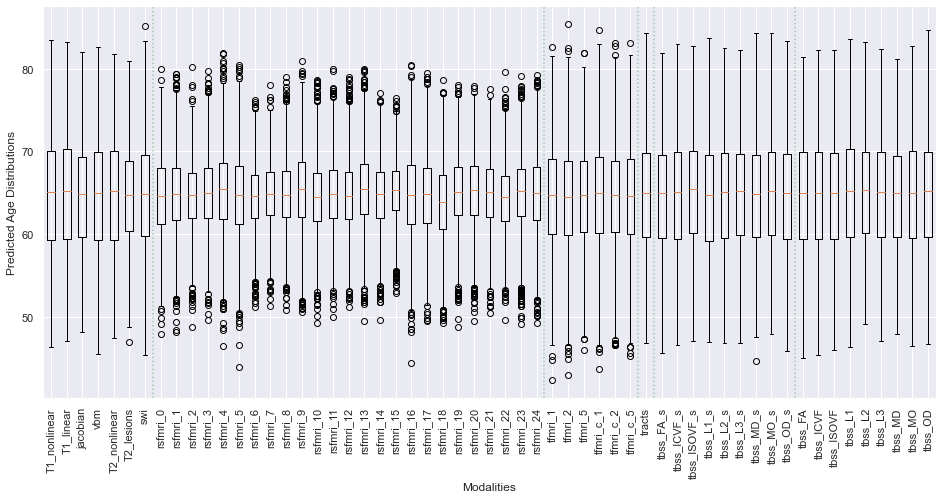

In [24]:
df_test = {}
for idx in range(len(df)):
    name = df.iloc[idx].modality
    data = df.iloc[idx].dataframe.mean_output_age.to_list()
    df_test[name] = data
    
df_test = pd.DataFrame.from_dict(df_test)

array = np.array(df_test)

fig = plt.figure(figsize=(16, 7.2))
plt.boxplot(array);
plt.xticks(np.arange(1, array.shape[1]+1), df_test.columns.to_list(), rotation=90);

plt.xlabel("Modalities")
plt.ylabel("Predicted Age Distributions")
plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5);

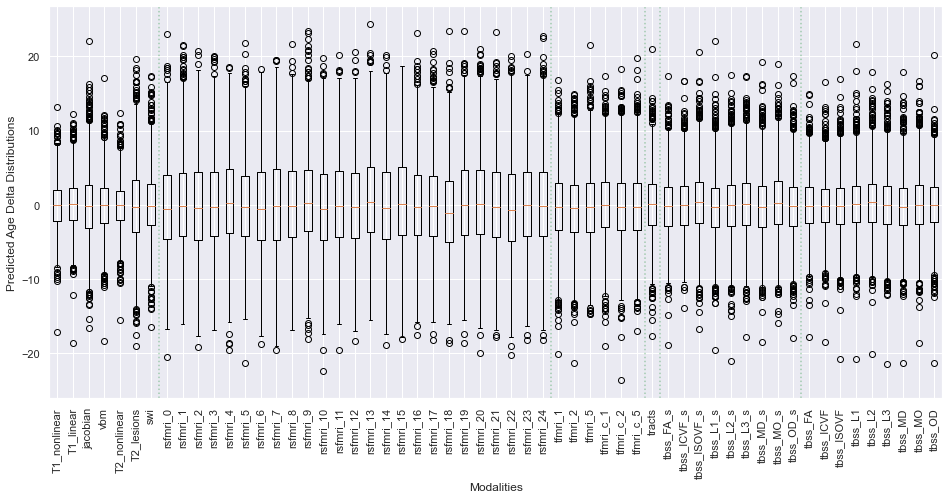

In [25]:
df_test = {}
for idx in range(len(df)):
    name = df.iloc[idx].modality
    data = df.iloc[idx].dataframe.mean_age_delta.to_list()
    df_test[name] = data
    
df_test = pd.DataFrame.from_dict(df_test)

array = np.array(df_test)

fig = plt.figure(figsize=(16, 7.2))
plt.boxplot(array);
plt.xticks(np.arange(1, array.shape[1]+1), df_test.columns.to_list(), rotation=90);

plt.xlabel("Modalities")
plt.ylabel("Predicted Age Delta Distributions")
plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5);

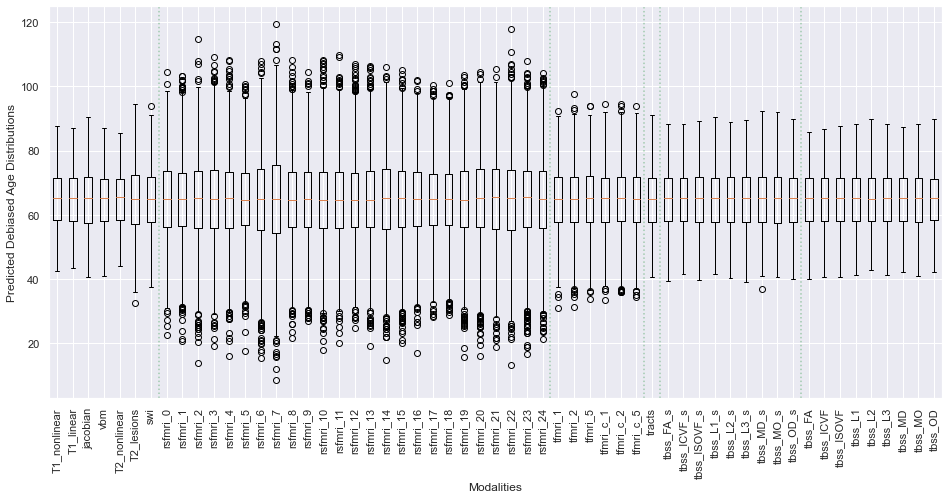

In [26]:
df_test = {}
for idx in range(len(df)):
    name = df.iloc[idx].modality
    data = df.iloc[idx].dataframe.output_age_decon.to_list()
    df_test[name] = data
    
df_test = pd.DataFrame.from_dict(df_test)

array = np.array(df_test)

fig = plt.figure(figsize=(16, 7.2))
plt.boxplot(array);
plt.xticks(np.arange(1, array.shape[1]+1), df_test.columns.to_list(), rotation=90);

plt.xlabel("Modalities")
plt.ylabel("Predicted Debiased Age Distributions")
plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5);

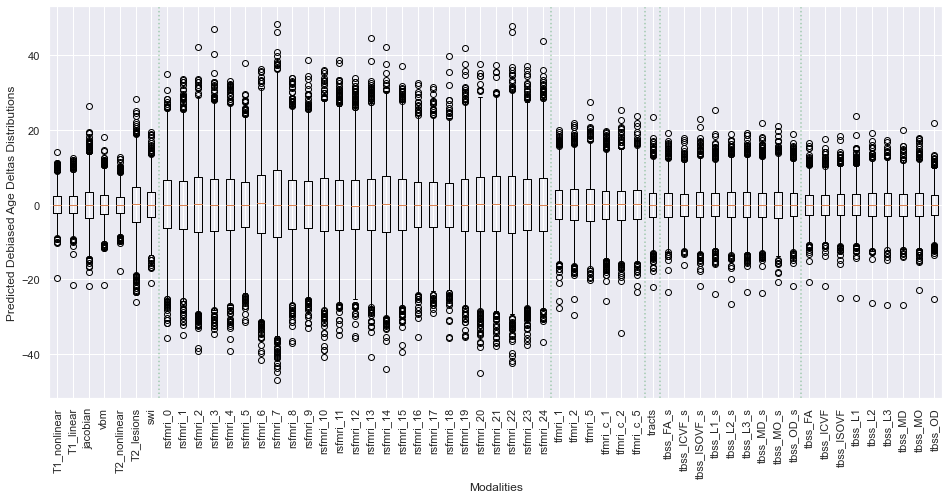

In [27]:
df_test = {}
for idx in range(len(df)):
    name = df.iloc[idx].modality
    data = df.iloc[idx].dataframe.age_delta_decon.to_list()
    df_test[name] = data
    
df_test = pd.DataFrame.from_dict(df_test)

array = np.array(df_test)

fig = plt.figure(figsize=(16, 7.2))
plt.boxplot(array);
plt.xticks(np.arange(1, array.shape[1]+1), df_test.columns.to_list(), rotation=90);

plt.xlabel("Modalities")
plt.ylabel("Predicted Debiased Age Deltas Distributions")
plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5);

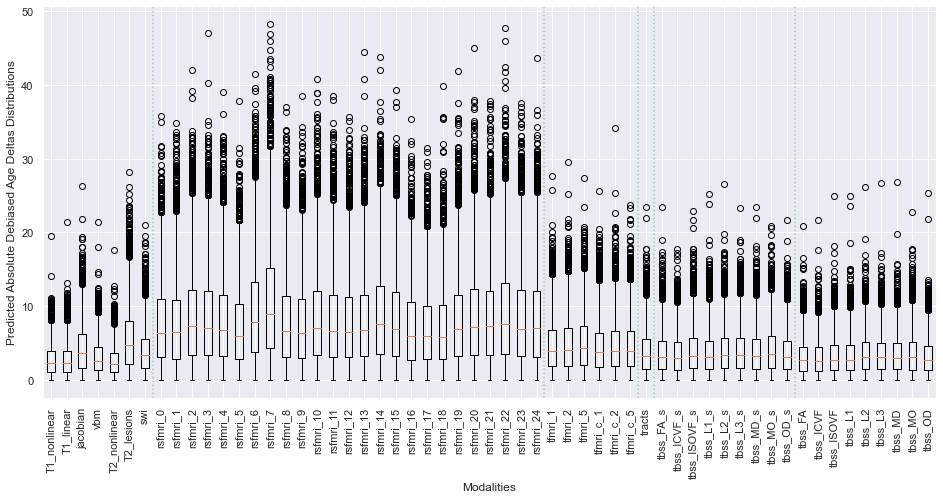

In [28]:
df_test = {}
for idx in range(len(df)):
    name = df.iloc[idx].modality
    data = df.iloc[idx].dataframe.age_delta_decon.to_list()
    df_test[name] = data
    
df_test = pd.DataFrame.from_dict(df_test)

array = np.abs(np.array(df_test))

fig = plt.figure(figsize=(16, 7.2))
plt.boxplot(array);
plt.xticks(np.arange(1, array.shape[1]+1), df_test.columns.to_list(), rotation=90);

plt.xlabel("Modalities")
plt.ylabel("Predicted Absolute Debiased Age Deltas Distributions")
plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5);

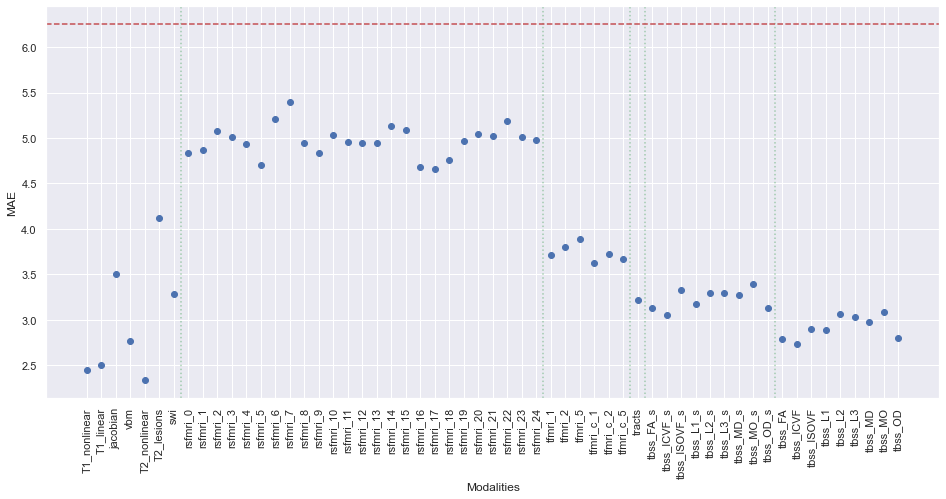

In [29]:
df_test = {}
for idx in range(len(df)):
    name = df.iloc[idx].modality
    data = df.iloc[idx].dataframe.mean_age_delta.to_list()
    df_test[name] = data
    
df_test = pd.DataFrame.from_dict(df_test)

array = np.array(df_test)

fig = plt.figure(figsize=(16, 7.2))
# plt.scatter(np.arange(1, len(array), 1), array);
plt.scatter(np.arange(1, array.shape[1]+1), abs(array).mean(axis=0))
plt.xticks(np.arange(1, array.shape[1]+1), df_test.columns.to_list(), rotation=90);

plt.xlabel("Modalities")
plt.ylabel("MAE")
plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5);
plt.axhline(y=6.253, color='r', linestyle='dashed')

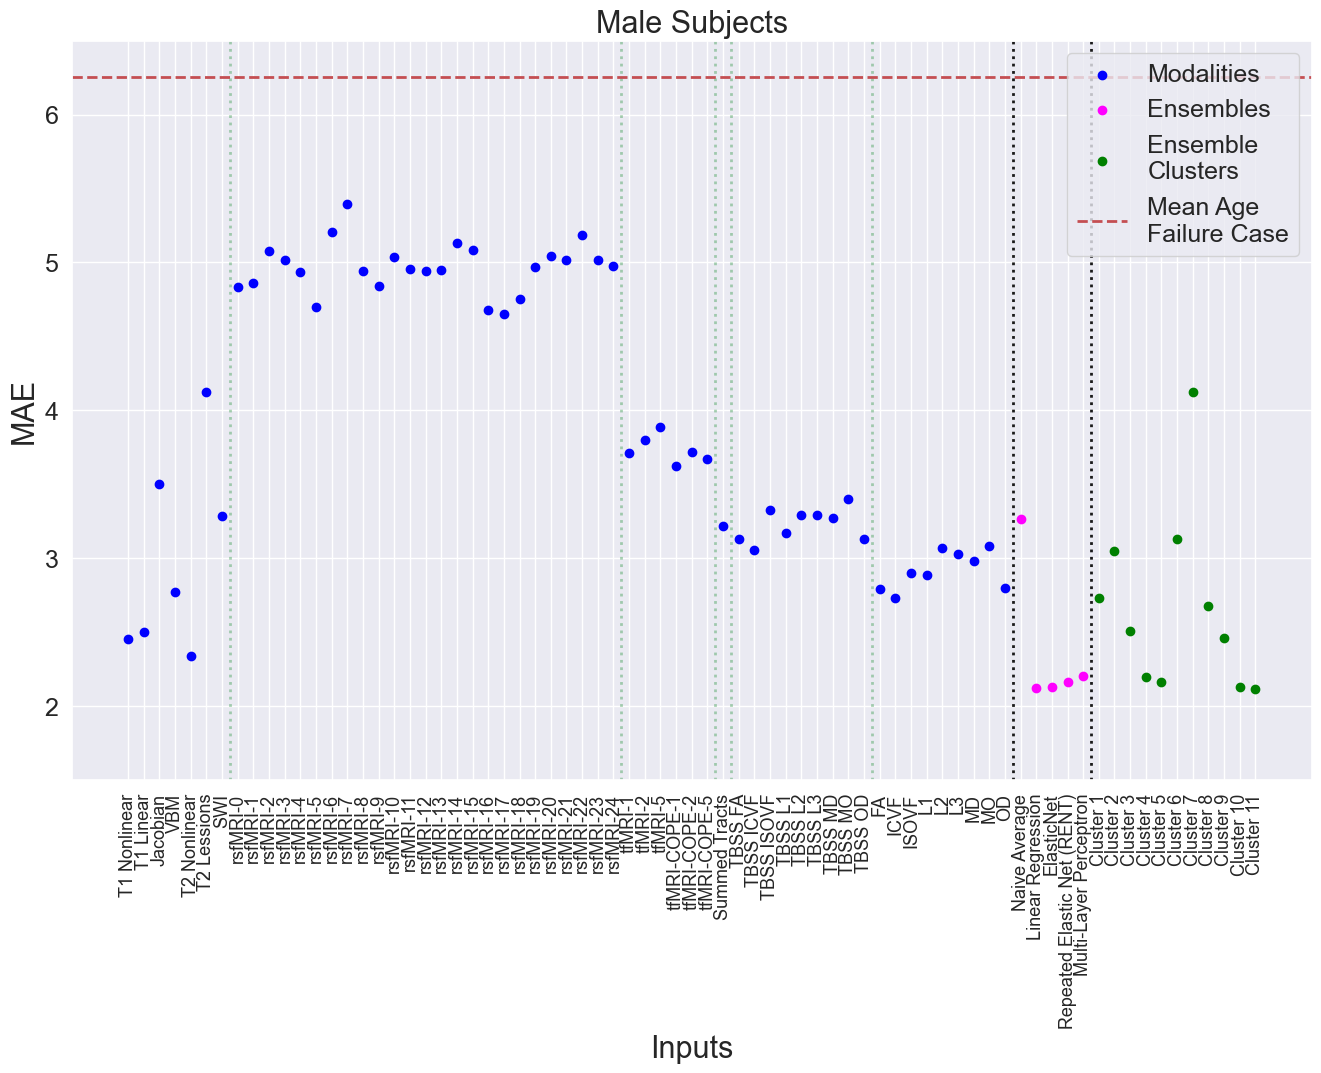

In [6]:
df = pd.read_pickle('male_test.pkl')

MAEsIDP = [
3.265,
2.124,
2.127,
2.162,
2.202,]
# namesIDPs = df.modality.to_list()
namesIDPs = ['Naive Average',
'Linear Regression',
'ElasticNet',
'Repeated Elastic Net (RENT)',
'Multi-Layer Perceptron']

MAEs2 = [
    2.733,
    3.047,
    2.510,
    2.194,
    2.164,
    3.127,
    4.121,
    2.678,
    2.457,
    2.127,
    2.118
]

names2 = [
    'Cluster 1',
    'Cluster 2',
    'Cluster 3',
    'Cluster 4',
    'Cluster 5',
    'Cluster 6',
    'Cluster 7',
    'Cluster 8',
    'Cluster 9',
    'Cluster 10',
    'Cluster 11'
]

    
MAEsNN = []
# namesNN = dfNN.modality.to_list()
namesNN = [
    'T1 Nonlinear', 'T1 Linear', 'Jacobian', 'VBM', 'T2 Nonlinear', 'T2 Lessions', 'SWI', 'rsfMRI-0', 'rsfMRI-1',
    'rsfMRI-2', 'rsfMRI-3', 'rsfMRI-4', 'rsfMRI-5', 'rsfMRI-6', 'rsfMRI-7', 'rsfMRI-8', 'rsfMRI-9', 'rsfMRI-10', 
    'rsfMRI-11', 'rsfMRI-12', 'rsfMRI-13', 'rsfMRI-14', 'rsfMRI-15', 'rsfMRI-16', 'rsfMRI-17', 'rsfMRI-18', 'rsfMRI-19',
    'rsfMRI-20', 'rsfMRI-21', 'rsfMRI-22', 'rsfMRI-23', 'rsfMRI-24', 'tfMRI-1', 'tfMRI-2', 'tfMRI-5', 'tfMRI-COPE-1',
    'tfMRI-COPE-2', 'tfMRI-COPE-5', 'Summed Tracts', 'TBSS FA', 'TBSS ICVF', 'TBSS ISOVF', 'TBSS L1', 'TBSS L2',
    'TBSS L3', 'TBSS MD', 'TBSS MO', 'TBSS OD', 'FA', 'ICVF', 'ISOVF', 'L1', 'L2', 'L3', 'MD', 'MO', 'OD'
]
for idx in range(len(df)):
    data = df.iloc[idx].dataframe.mean_age_delta.to_list()
    MAEsNN.append(np.abs(np.array(data)).mean())
    
# df_test = pd.DataFrame.from_dict(df_test)

MAEs = MAEsNN + MAEsIDP + MAEs2
names = namesNN + namesIDPs + names2

MAEsIDP = np.array(MAEsIDP)
MAEsNN = np.array(MAEsNN)
MAEs2 = np.array(MAEs2)

namesIDPs = np.array(namesIDPs)
namesNN = np.array(namesNN)
names2 = np.array(names2)

MAEs = np.array(MAEs)
names = np.array(names)

col =[]

for i in range(0, len(MAEs)):
    if i<=len(MAEsNN):
        col.append('blue')  
    else:
        col.append('magenta') 
        
title_font_size=22
ticks_font_size=18
legend_font = 18
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize)

plt.scatter(np.arange(1, MAEsNN.shape[0]+1), MAEsNN, c='blue', label='Modalities')
plt.scatter(np.arange(MAEsNN.shape[0]+1, MAEsNN.shape[0]+MAEsIDP.shape[0]+1), MAEsIDP, c='magenta', label='Ensembles')
plt.scatter(np.arange(MAEsNN.shape[0]+MAEsIDP.shape[0]+1, 
                      MAEsNN.shape[0]+MAEsIDP.shape[0]+MAEs2.shape[0]+1),
            MAEs2, c='green', label='Ensemble\nClusters')
plt.xticks(np.arange(1, MAEs.shape[0]+1), names, rotation=90,fontsize= ticks_font_size-5 );
plt.yticks(fontsize= ticks_font_size)
plt.xlabel("Inputs", fontsize=title_font_size)
plt.ylabel("MAE", fontsize=title_font_size)
plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
plt.axhline(y=6.253, color='r', linestyle='dashed', label='Mean Age\nFailure Case', linewidth=2)
plt.axvline(x=57.5, color='k', linestyle='dotted', linewidth=2);
plt.axvline(x=62.5, color='k', linestyle='dotted', linewidth=2);
# plt.axvline(x=58.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=65.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=67.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
# plt.axvline(x=68.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);

plt.legend(loc=1, fontsize=legend_font)

plt.ylim([1.5, 6.5])
plt.title('Male Subjects', fontsize=title_font_size)

fig.savefig('Male_MAE_ensemble_predictions.png', bbox_inches='tight')

# Test what happens if debiasing before deconfounding

In [30]:
dfs[0]

,Unnamed: 0,target_age,output_age_1,age_delta_1,loss_1,output_age_2,age_delta_2,loss_2,output_age_3,age_delta_3,loss_3,mean_output_age,mean_age_delta,output_age_decon,age_delta_decon
0,25604371,67.942123,67.507900,-0.434227,0.188553,69.783430,1.841309,3.390418,67.384964,-0.557159,0.310426,68.225431,0.283308,69.078959,1.136836
1,23448390,56.832306,62.910760,6.078453,36.947591,64.360460,7.528152,56.673079,64.519295,7.686989,59.089797,63.930172,7.097866,63.853619,7.021313
2,24979938,52.831164,50.722595,-2.108569,4.446064,52.619720,-0.211444,0.044709,53.288006,0.456841,0.208704,52.210107,-0.621057,49.595733,-3.235432
3,25491324,67.269977,65.640020,-1.629955,2.656753,66.204270,-1.065708,1.135733,66.447070,-0.822910,0.677181,66.097120,-1.172857,66.489791,-0.780186
4,21451642,56.467009,50.530365,-5.936644,35.243744,51.535126,-4.931883,24.323474,50.964710,-5.502299,30.275293,51.010067,-5.456942,48.135840,-8.331169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4360,25869023,54.817237,53.636505,-1.180732,1.394129,53.514510,-1.302726,1.697096,56.241024,1.423787,2.027168,54.464013,-0.353224,52.337692,-2.479546
4361,25681811,62.667237,64.949100,2.281859,5.206882,65.553510,2.886275,8.330584,65.397430,2.730193,7.453954,65.300013,2.632776,65.520081,2.852844
4362,23068218,75.562900,75.194565,-0.368335,0.135670,76.616380,1.053479,1.109819,72.613785,-2.949115,8.697278,74.808243,-0.754656,77.087190,1.524290
4363,21199766,77.999658,69.663270,-8.336388,69.495373,70.705340,-7.294320,53.207104,71.817310,-6.182351,38.221464,70.728640,-7.271018,72.124204,-5.875454


In [31]:
for idx in range(len(dfs)):
    dfs[idx]['output_age_decon_1'] = age_debiasing(dfs[idx].output_age_1, dfs[idx].target_age)
    dfs[idx]['output_age_decon_2'] = age_debiasing(dfs[idx].output_age_2, dfs[idx].target_age) 
    dfs[idx]['output_age_decon_3'] = age_debiasing(dfs[idx].output_age_3, dfs[idx].target_age) 
    dfs[idx]['mean_output_age_decon'] = dfs[idx][['output_age_decon_1', 'output_age_decon_2', 'output_age_decon_3']].mean(axis=1)
    dfs[idx]['mean_age_delta_decon'] = dfs[idx]['mean_output_age_decon'] - dfs[idx]['target_age']

In [32]:
dfs[0]

,Unnamed: 0,target_age,output_age_1,age_delta_1,loss_1,output_age_2,age_delta_2,loss_2,output_age_3,age_delta_3,loss_3,mean_output_age,mean_age_delta,output_age_decon,age_delta_decon,output_age_decon_1,output_age_decon_2,output_age_decon_3,mean_output_age_decon,mean_age_delta_decon
0,25604371,67.942123,67.507900,-0.434227,0.188553,69.783430,1.841309,3.390418,67.384964,-0.557159,0.310426,68.225431,0.283308,69.078959,1.136836,68.849141,70.714516,67.654649,69.072769,1.130645
1,23448390,56.832306,62.910760,6.078453,36.947591,64.360460,7.528152,56.673079,64.519295,7.686989,59.089797,63.930172,7.097866,63.853619,7.021313,63.161532,64.199310,64.182746,63.847862,7.015557
2,24979938,52.831164,50.722595,-2.108569,4.446064,52.619720,-0.211444,0.044709,53.288006,0.456841,0.208704,52.210107,-0.621057,49.595733,-3.235432,48.082262,50.093876,50.575471,49.583870,-3.247295
3,25491324,67.269977,65.640020,-1.629955,2.656753,66.204270,-1.065708,1.135733,66.447070,-0.822910,0.677181,66.097120,-1.172857,66.489791,-0.780186,66.538189,66.414480,66.518343,66.490337,-0.779640
4,21451642,56.467009,50.530365,-5.936644,35.243744,51.535126,-4.931883,24.323474,50.964710,-5.502299,30.275293,51.010067,-5.456942,48.135840,-8.331169,47.844434,48.790835,47.760681,48.131983,-8.335026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4360,25869023,54.817237,53.636505,-1.180732,1.394129,53.514510,-1.302726,1.697096,56.241024,1.423787,2.027168,54.464013,-0.353224,52.337692,-2.479546,51.687369,51.168885,54.153202,52.336485,-2.480752
4361,25681811,62.667237,64.949100,2.281859,5.206882,65.553510,2.886275,8.330584,65.397430,2.730193,7.453954,65.300013,2.632776,65.520081,2.852844,65.683378,65.632651,65.246651,65.520893,2.853656
4362,23068218,75.562900,75.194565,-0.368335,0.135670,76.616380,1.053479,1.109819,72.613785,-2.949115,8.697278,74.808243,-0.754656,77.087190,1.524290,78.359128,78.923686,73.989630,77.090814,1.527915
4363,21199766,77.999658,69.663270,-8.336388,69.495373,70.705340,-7.294320,53.207104,71.817310,-6.182351,38.221464,70.728640,-7.271018,72.124204,-5.875454,71.515777,71.822107,73.024660,72.120848,-5.878809


In [33]:
print("{:13} : {:14}  |  {:14}  |  {:13}  |   {:13}  |  {:}  |  {:} ".format('Modality', 'MAE (DECON)', 'MAE (DECON B)', "MSE (DECON)", "MSE (DECON B)",  "PR (DECON)", "PR (DECON B)"))
print('-----------------------------------------------------------------------------------------------')

for idx in range(len(dfs)):
    print("{:13} :  {:.3f} ± {:.3f}  |   {:.3f} ± {:.3f}   |   {:.3f} ± {:.3f}  |   {:.3f} ± {:.3f}   |   {:.3f}   |   {:.3f} ".format(
        names[idx],
        
        np.abs(dfs[idx].age_delta_decon).mean(), np.abs(dfs[idx].age_delta_decon).std()/np.sqrt(len(dfs[idx])),
        np.abs(dfs[idx].mean_age_delta_decon).mean(), np.abs(dfs[idx].mean_age_delta_decon).std()/np.sqrt(len(dfs[idx])),
        
        np.square(np.subtract(dfs[idx].target_age, dfs[idx].output_age_decon)).mean(), np.square(np.subtract(dfs[idx].target_age, dfs[idx].output_age_decon)).std()/np.sqrt(len(dfs[idx])),
        np.square(np.subtract(dfs[idx].target_age, dfs[idx].mean_output_age_decon)).mean(), np.square(np.subtract(dfs[idx].target_age, dfs[idx].mean_output_age_decon)).std()/np.sqrt(len(dfs[idx])),
        
        pearsonr(dfs[idx].target_age, dfs[idx].output_age_decon)[0],
        pearsonr(dfs[idx].target_age, dfs[idx].mean_output_age_decon)[0],
    )
         )

Modality      : MAE (DECON)     |  MAE (DECON B)   |  MSE (DECON)    |   MSE (DECON B)  |  PR (DECON)  |  PR (DECON B) 
-----------------------------------------------------------------------------------------------
T1_nonlinear  :  2.665 ± 0.031  |   2.665 ± 0.031   |   11.198 ± 0.251  |   11.195 ± 0.251   |   0.915   |   0.915 
T1_linear     :  2.738 ± 0.032  |   2.742 ± 0.032   |   11.839 ± 0.272  |   11.869 ± 0.273   |   0.911   |   0.910 
jacobian      :  4.288 ± 0.050  |   4.289 ± 0.050   |   29.237 ± 0.653  |   29.256 ± 0.653   |   0.814   |   0.814 
vbm           :  3.116 ± 0.036  |   3.117 ± 0.036   |   15.267 ± 0.347  |   15.270 ± 0.347   |   0.889   |   0.889 
T2_nonlinear  :  2.542 ± 0.029  |   2.543 ± 0.029   |   10.225 ± 0.232  |   10.237 ± 0.232   |   0.921   |   0.921 
T2_lesions    :  5.582 ± 0.065  |   5.583 ± 0.065   |   49.322 ± 1.088  |   49.341 ± 1.088   |   0.734   |   0.734 
swi           :  3.942 ± 0.045  |   3.942 ± 0.045   |   24.495 ± 0.545  |   24.496 ± 0.5